<a href="https://colab.research.google.com/github/lujanacj/NEUR-265/blob/main/coding_homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding Homework #4

**Instructions**

1. Make a *Markdown Cell* that contains the following information:
- Your name (small header)
- The name of this class (italicized)
- The date (bolded)

2. Create a *Code Cell* that imports relevant modules - specifically, <code>pandas as pd</code>, <code>matplotlib.pyplot as plt</code>, and <code>scipy.stats as stats</code>.

3. For this assignment, you'll be using the <code>patch_seq_expanded.csv</code> file located in our class GitHub repo. Create a *Code Cell* that loads this file in as a <code>Pandas dataFrame</code> called <code>patch_seq</code>.

4. In a new *Code Cell*, using the <code>df.plot</code> method from the <code>pandas</code> module, make a bar graph that displays the value counts (how many observations) from the "Marker" column of your <code>patch_seq</code> variable. Label your x and y-axes.

5. In a new *Code Cell*, repeat step 4, but make a pie chart instead of a bar graph.

6. In a new *Code Cell*, use a <code>for</code> loop to make a scatter plot of the "ISI" (on the x-axis) and "Fast_Trough" (on the y-axis) values in your <code>patch_seq</code> dataframe. Your loop should make data points from "Sst" neurons <font color = 'red'>red</font>, and data points from "Pvalb" neurons <font color = 'blue'>blue</font>.

7. In a new *Code Cell*, create a <code>function</code> called <code>patchScatter()</code> that will output the scatter plot created in step 6 when you call it. Don't forget to tell it to show your scatter plot!

8. In a new *Code Cell*, return the mean, standard deviation, and range of the "Fast_Trough" column for "Sst" neurons and "Pvalb" neurons. You can do this with the <code>pandas</code> method <code>describe</code>, like so:

<code>patch_seq.groupby('Marker')['Fast_Trough'].describe()</code>

9. In a new *Markdown Cell*, describe the difference in means between "Sst" neurons and "Pvalb" neurons. Which group has a more negative undershoot following an action potential?

10. In a new *Code Cell*, return the skewness of the "Fast_Trough" column for "Sst" neurons and "Pvalb" neurons. You can do this with the <code>pandas</code> method <code>skew</code> (follow the syntax in step 8 to apply this method to <code>patch_seq</code>).

11. In a new *Markdown Cell*, interpret the results of your skewness test. Generally, values >0.5, or <-0.5, indicate a skewed distribution, while values between -0.5 and 0.5 indicate a normal distribution.

12. In a new *Code Cell*, repeat step 10 for the "ISI" column of <code>patch_seq</code>.

13. In a new *Markdown Cell*, repeat step 11 for the "ISI" column of <code>patch_seq</code>.

14. Finally, in a new *Code Cell*, let's perform a t-test to see if our "Fast_Trough" and "ISI" values differ between "Sst" and "Pvalb" neurons. To do this for our "Fast_Trough" values, we should first isolate each group and make each of them into a separate variable. An example of how to do this for "Sst" neurons is below:

<code>sst_neurons = patch_seq[patch_seq['Marker']=='Sst']</code>

Use the same code to create another variable called <code>pvalb_neurons</code>. Once you've made your two variables, perform an independent-samples t-test to compare "Fast_Trough" values between the two groups:

<code>stats.ttest_ind(sst_neurons['Fast_Trough'], pvalb_neurons['Fast_Trough'])</code>.

15. In a *Markdown Cell*, describe the results of your t-test. Does the undershoot voltage significantly differ betwen the two groups?

16. In a new *Code Cell*, repeat step 14 for "ISI". You won't need to create new <code>sst_neurons</code> and <code>pvalb_neurons</code> variables - you'll just need to run a new t-test.

17. In a new *Markdown Cell*, repeat step 15 for the results of your new t-test.

18. Make sure to put a <code>#</code> in each *Code Cell* to describe what it does.

19. Save a copy of this notebook to your GitHub repo with the title <code>coding_homework_4.ipynb</code>.




### Jacob Lujanac
*NEUR 265*

**3/7/24**



In [109]:
#2. Importing packages
import pandas as pd

from matplotlib import pyplot as plt

import scipy.stats as stats

In [110]:
#3. Loading Data
url = 'https://raw.githubusercontent.com/hallockh/neur_265/main/data/patch_seq_expanded.csv'

patch_seq = pd.read_csv(url)

<Axes: xlabel='Marker', ylabel='Count'>

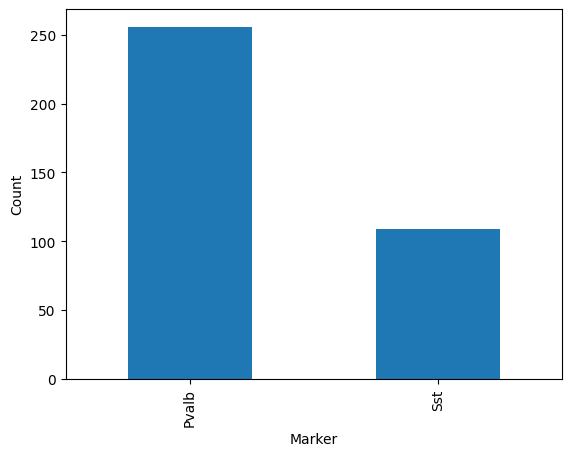

In [111]:
#4. Bar graph

patch_seq_markers = patch_seq['Marker'].value_counts()
patch_seq_markers.plot(kind='bar',xlabel='Marker',ylabel='Count')


<Axes: ylabel='Marker'>

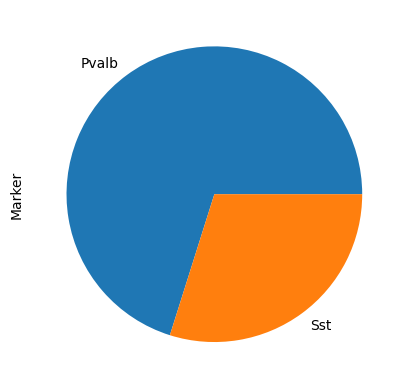

In [112]:
#5. Pie graph
patch_seq_markers.plot(kind='pie')


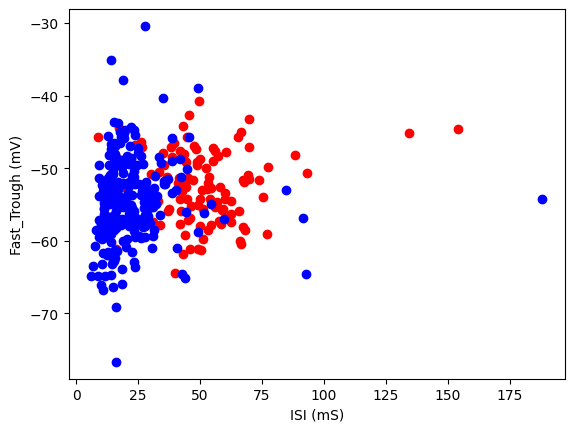

In [113]:
#6. Scatter plot

for i in range(patch_seq.shape[0]):
  if patch_seq.iloc[i,2]=='Sst':
    colorValue = 'red'
  else:
    colorValue = 'blue'
  plt.scatter(patch_seq.iloc[i,0],patch_seq.iloc[i,1],color=colorValue)
  plt.xlabel('ISI (mS)')
  plt.ylabel('Fast_Trough (mV)')




In [114]:
#7. patchScatter() function
def patchScatter():
  for i in range(patch_seq.shape[0]):
    if patch_seq.iloc[i,2]=='Sst':
      colorValue = 'red'
    else:
      colorValue = 'blue'
    plt.scatter(patch_seq.iloc[i,0],patch_seq.iloc[i,1],color=colorValue)
    plt.xlabel('ISI (mS)')
    plt.ylabel('Fast_Trough (mV)')
    plt.show()

In [115]:
#8. Mean, standard deviation, and range
patch_seq.groupby('Marker')['Fast_Trough'].describe()

,count,mean,std,min,25%,50%,75%,max
Marker,,,,,,,,
Pvalb,256.0,-54.548074,5.870670,-76.687508,-57.914063,-54.490629,-51.364065,-30.406252
Sst,109.0,-52.514968,4.958103,-64.375008,-55.931252,-52.568752,-48.500000,-40.781254


#9. Difference in means

Pvalb has a more negative undershoot following an action potential as its mean is lower

In [116]:
#10. Skewness of Fast Trough
patch_seq.groupby('Marker')['Fast_Trough'].skew()

Marker
Pvalb    0.19536
Sst      0.00125
Name: Fast_Trough, dtype: float64

#11. Fast Trough skewness results interpretation
Pvalb and Sst both display a normal distribution as their skewness values are 0.195 and 0.001 respectively, both which are less than 0.5. Since Sst's is larger however, that means it is more skewed.

In [117]:
#12. Skewness of ISI
patch_seq.groupby('Marker')['ISI'].skew()

Marker
Pvalb    5.596386
Sst      1.857850
Name: ISI, dtype: float64

#13. ISI skewness results interpretation
# Pvalb and Sst both display a skewed distribution as their skewness values are 5.59 and 1.85 respectively, both which are greaters than 0.5. Since Pvalb's is larger however, that means it is more skewed.

In [129]:
#14. Fast Trough t-test
sst_neurons = patch_seq[patch_seq['Marker']=='Sst']
pvalb_neurons = patch_seq[patch_seq['Marker']=='Pvalb']

stats.ttest_ind(sst_neurons['Fast_Trough'], pvalb_neurons['Fast_Trough'])


109    22.306667
110    19.047500
111    12.510633
112    27.172000
113    24.853158
         ...    
360    11.052333
361     8.860360
362     9.192897
363    10.544731
364    16.396364
Name: ISI, Length: 256, dtype: float64

#15. Fast Trough t-test analysis

The undershoot voltage does differ signficantly, as the p-value =0.0016 < 0.05


In [130]:
#16. ISI t-test

pvalb_neurons = pvalb_neurons.dropna()
stats.ttest_ind(sst_neurons['ISI'], pvalb_neurons['ISI'])


TtestResult(statistic=14.643966775010774, pvalue=2.694292788633572e-38, df=354.0)

#17. ISI t-test analysis

The interspike intervals are not statistcally signficant, as the p-value=2.69 > 0.05